In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [7]:
df = pd.read_csv('Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,SEVERITYDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Property Damage Only Collision,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Property Damage Only Collision,NaN,0,Overcast,Dry,Daylight,NaN
3,1,Property Damage Only Collision,NaN,N,Clear,Dry,Daylight,NaN
4,2,Injury Collision,NaN,0,Raining,Wet,Daylight,NaN
5,1,Property Damage Only Collision,NaN,N,Clear,Dry,Daylight,NaN
6,1,Property Damage Only Collision,NaN,0,Raining,Wet,Daylight,NaN
7,2,Injury Collision,NaN,N,Clear,Dry,Daylight,NaN
8,1,Property Damage Only Collision,NaN,0,Clear,Dry,Daylight,NaN
9,2,Injury Collision,NaN,0,Clear,Dry,Daylight,NaN


In [8]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
#data Cleansing
df = df[[ 'INCDATE', 'ADDRTYPE', 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL', 'SEVERITYCODE']]
print(df.shape)
df.head()

(194673, 8)


,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
0,2013/03/27 00:00:00+00,Intersection,N,Daylight,Wet,Overcast,N,2
1,2006/12/20 00:00:00+00,Block,N,Dark - Street Lights On,Wet,Raining,0,1
2,2004/11/18 00:00:00+00,Block,N,Daylight,Dry,Overcast,0,1
3,2013/03/29 00:00:00+00,Block,N,Daylight,Dry,Clear,N,1
4,2004/01/28 00:00:00+00,Intersection,N,Daylight,Wet,Raining,0,2


In [10]:
df.count()

INCDATE         194673
ADDRTYPE        192747
HITPARKEDCAR    194673
LIGHTCOND       189503
ROADCOND        189661
WEATHER         189592
UNDERINFL       189789
SEVERITYCODE    194673
dtype: int64

In [11]:
df = df.dropna()
df.count()

INCDATE         187525
ADDRTYPE        187525
HITPARKEDCAR    187525
LIGHTCOND       187525
ROADCOND        187525
WEATHER         187525
UNDERINFL       187525
SEVERITYCODE    187525
dtype: int64

In [12]:
df['INCDATE'] = pd.to_datetime(df['INCDATE']).dt.date

In [13]:
analysis = df.copy()
df['ADDRTYPE'].value_counts()

Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64

In [14]:
df['HITPARKEDCAR'].value_counts()

N    180883
Y      6642
Name: HITPARKEDCAR, dtype: int64

In [15]:
c = df.HITPARKEDCAR.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['HITPARKEDCAR'] = df.HITPARKEDCAR.astype('category').cat.codes
df['HITPARKEDCAR'].value_counts()

{0: 'N', 1: 'Y'}


0    180883
1      6642
Name: HITPARKEDCAR, dtype: int64

In [16]:

df['LIGHTCOND'].value_counts()

Daylight                    115408
Dark - Street Lights On      48236
Unknown                      12599
Dusk                          5843
Dawn                          2491
Dark - No Street Lights       1526
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [17]:
c = df.LIGHTCOND.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['LIGHTCOND'] = df.LIGHTCOND.astype('category').cat.codes
df['LIGHTCOND'].value_counts()

{0: 'Dark - No Street Lights', 1: 'Dark - Street Lights Off', 2: 'Dark - Street Lights On', 3: 'Dark - Unknown Lighting', 4: 'Dawn', 5: 'Daylight', 6: 'Dusk', 7: 'Other', 8: 'Unknown'}


5    115408
2     48236
8     12599
6      5843
4      2491
0      1526
1      1184
7       227
3        11
Name: LIGHTCOND, dtype: int64

In [18]:
df['ROADCOND'].value_counts()

Dry               123736
Wet                47223
Unknown            14009
Ice                 1193
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

In [19]:
c = df.ROADCOND.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['ROADCOND'] = df.ROADCOND.astype('category').cat.codes
df['ROADCOND'].value_counts()

{0: 'Dry', 1: 'Ice', 2: 'Oil', 3: 'Other', 4: 'Sand/Mud/Dirt', 5: 'Snow/Slush', 6: 'Standing Water', 7: 'Unknown', 8: 'Wet'}


0    123736
8     47223
7     14009
1      1193
5       992
3       124
6       111
4        73
2        64
Name: ROADCOND, dtype: int64

In [20]:
df['WEATHER'].value_counts()

Clear                       110499
Raining                      32976
Overcast                     27551
Unknown                      14059
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [21]:
c = df.WEATHER.astype('category')

d = dict(enumerate(c.cat.categories))
print(d)
df['WEATHER'] = df.WEATHER.astype('category').cat.codes
df['WEATHER'].value_counts()


{0: 'Blowing Sand/Dirt', 1: 'Clear', 2: 'Fog/Smog/Smoke', 3: 'Other', 4: 'Overcast', 5: 'Partly Cloudy', 6: 'Raining', 7: 'Severe Crosswind', 8: 'Sleet/Hail/Freezing Rain', 9: 'Snowing', 10: 'Unknown'}


1     110499
6      32976
4      27551
10     14059
9        896
3        790
2        563
8        112
0         49
7         25
5          5
Name: WEATHER, dtype: int64

In [22]:
df['UNDERINFL'].value_counts()


N    98751
0    79706
Y     5076
1     3992
Name: UNDERINFL, dtype: int64

In [23]:
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)
df["UNDERINFL"].replace("0", 0, inplace=True)
df["UNDERINFL"].replace("1", 1, inplace=True)
df['UNDERINFL'].value_counts()

0    178457
1      9068
Name: UNDERINFL, dtype: int64

In [24]:
df['SEVERITYCODE'].value_counts()

1    130642
2     56883
Name: SEVERITYCODE, dtype: int64

In [25]:
df.tail()

,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
194668,2018-11-12,Block,0,5,0,1,0,2
194669,2018-12-18,Block,0,5,8,6,0,1
194670,2019-01-19,Intersection,0,5,0,1,0,2
194671,2019-01-15,Intersection,0,6,0,1,0,2
194672,2018-11-30,Block,0,5,8,1,0,1


In [26]:
# HITPARKEDCAR SPEEDING PEDROWNOTGRNT LIGHTCOND ROADCOND WEATHER UNDERINFL INATTENTIONIND 
# SEVERITYCODE

feature_df = df[[ 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL']]
print(feature_df.shape)
feature_df.head()

(187525, 5)


,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL
0,0,5,8,4,0
1,0,2,8,6,0
2,0,5,0,4,0
3,0,5,0,1,0
4,0,5,8,6,0


In [27]:
target_df = df[['SEVERITYCODE']]
print(target_df.shape)
target_df.head()

(187525, 1)


,SEVERITYCODE
0,2
1,1
2,1
3,1
4,2


In [28]:
#Methodology 
#Exploratory Analysis
analysis.head()

,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
0,2013-03-27,Intersection,N,Daylight,Wet,Overcast,N,2
1,2006-12-20,Block,N,Dark - Street Lights On,Wet,Raining,0,1
2,2004-11-18,Block,N,Daylight,Dry,Overcast,0,1
3,2013-03-29,Block,N,Daylight,Dry,Clear,N,1
4,2004-01-28,Intersection,N,Daylight,Wet,Raining,0,2


In [29]:
analysis['month'] = pd.DatetimeIndex(analysis['INCDATE']).month
analysis['year'] = pd.DatetimeIndex(analysis['INCDATE']).year
analysis.head()

,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE,month,year
0,2013-03-27,Intersection,N,Daylight,Wet,Overcast,N,2,3,2013
1,2006-12-20,Block,N,Dark - Street Lights On,Wet,Raining,0,1,12,2006
2,2004-11-18,Block,N,Daylight,Dry,Overcast,0,1,11,2004
3,2013-03-29,Block,N,Daylight,Dry,Clear,N,1,3,2013
4,2004-01-28,Intersection,N,Daylight,Wet,Raining,0,2,1,2004


In [34]:
#machine learning algorythm
feature_df.head()

,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL
0,0,5,8,4,0
1,0,2,8,6,0
2,0,5,0,4,0
3,0,5,0,1,0
4,0,5,8,6,0


In [35]:
X = feature_df
# X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL
0,0,5,8,4,0
1,0,2,8,6,0
2,0,5,0,4,0
3,0,5,0,1,0
4,0,5,8,6,0


In [36]:
target_df.head()

,SEVERITYCODE
0,2
1,1
2,1
3,1
4,2


In [37]:
y = target_df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

jss_list = []
f1_list = []

Train set: (150020, 5) (150020,)
Test set: (37505, 5) (37505,)


In [39]:
#Result
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score, f1_score

lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_yhat = lr_model.predict(X_test)

jss = round(jaccard_similarity_score(y_test, lr_yhat), 2)
jss_list.append(jss)
f1 = round(f1_score(y_test, lr_yhat, average = 'weighted'), 2)
f1_list.append(f1)

print(lr_model.score(X_test, y_test))
print(f"jaccard similarity score - ", jss)
print(f"f1 score - ", f1)

0.6968137581655779
jaccard similarity score -  0.7
f1 score -  0.57


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


[[26134     1]
 [11370     0]]


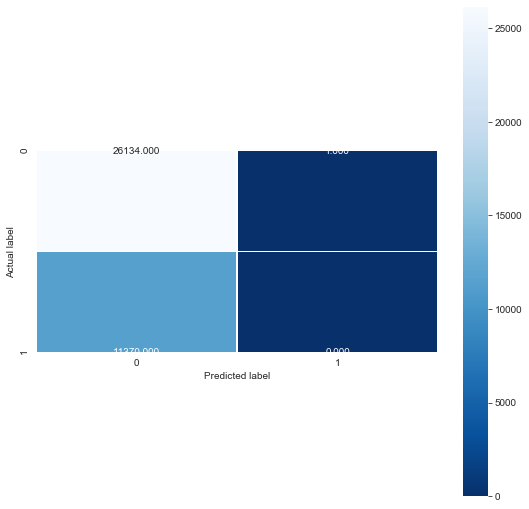

In [40]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, lr_yhat)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [ ]:
#K-nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

# Relation between k's and their respective accuracies

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [ ]:
knn_model = knn(n_neighbors = 8)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

jss = round(jaccard_similarity_score(y_test, knn_yhat), 2)
jss_list.append(jss)
f1 = round(f1_score(y_test, knn_yhat, average = 'weighted'), 2)
f1_list.append(f1)

print(knn_model.score(X_test, y_test))
print(f"jaccard similarity score - ", jss)
print(f"f1 score - ", f1)

In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

depth_range = range(1, 10)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dt_yhat)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [ ]:

columns = ['Logistic Regression', 'KNN', 'Decision Tree']
index = ['Jaccard', 'F1-score']

accuracy_df = pd.DataFrame([jss_list, f1_list], index = index, columns = columns)

accuracy = accuracy_df.transpose()
accuracy.columns.name = 'Algorithm'
accuracy